In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [2]:
#fetch the images count from folders

In [3]:
base_dir =r"D:\partiise section\natural_images"
img_size =180
batch=32

In [4]:
train= tf.keras.utils.image_dataset_from_directory(base_dir, 
                                                       seed=123, 
                                                       validation_split=0.2, 
                                                       subset="training", 
                                                       batch_size=batch, 
                                                       image_size=(img_size,img_size))
vald = tf.keras.utils.image_dataset_from_directory(base_dir, 
                                                       seed=123, 
                                                       validation_split=0.2, 
                                                       subset="validation", 
                                                       batch_size=batch, 
                                                       image_size=(img_size,img_size))

Found 2386 files belonging to 8 classes.
Using 1909 files for training.
Found 2386 files belonging to 8 classes.
Using 477 files for validation.


In [5]:
natural_names = train.class_names
natural_names

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

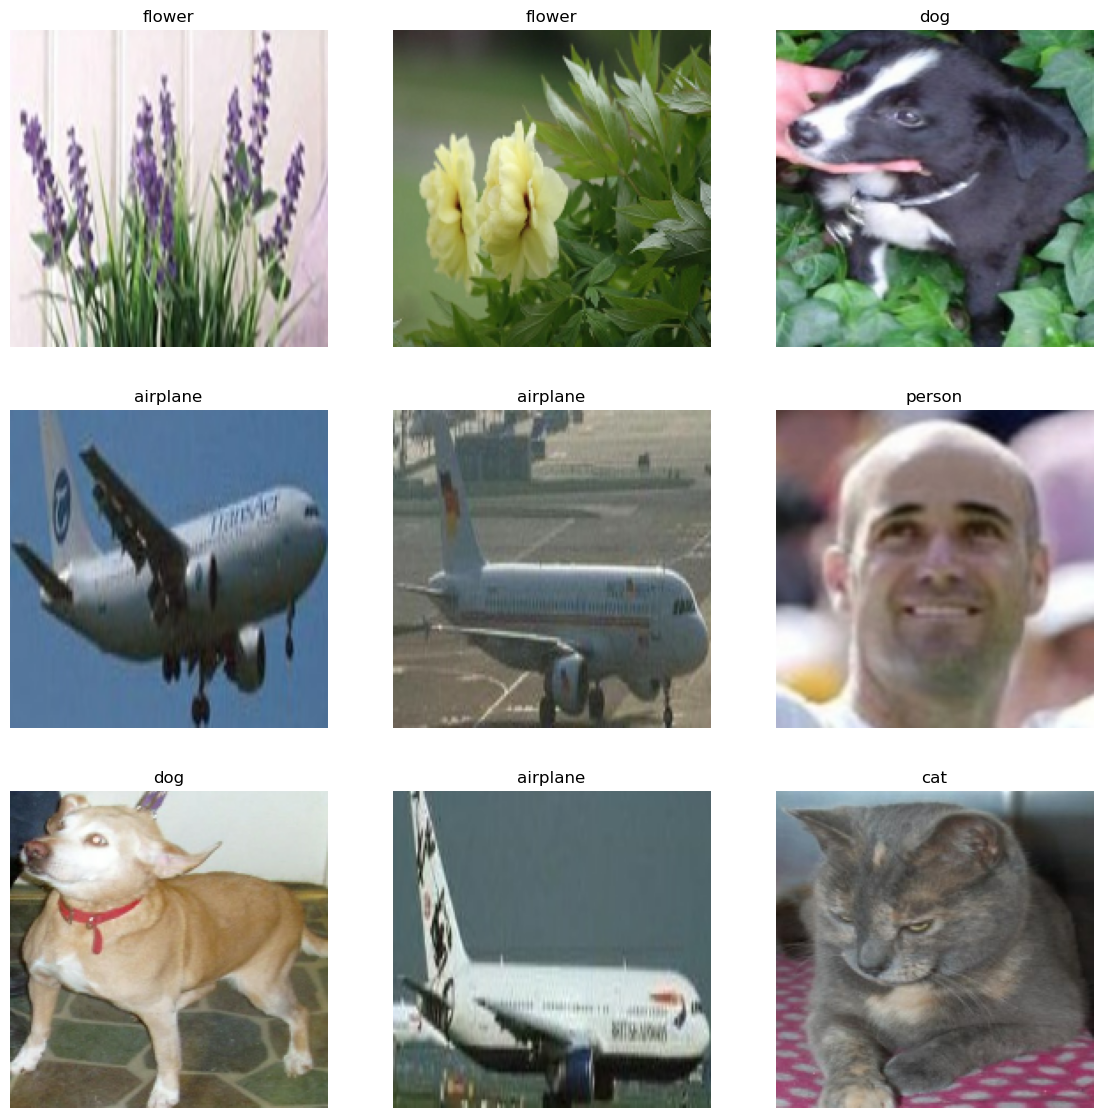

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
i=0
for images, labels in train.take(1):
    for i in range (9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(natural_names[labels[i]])
        plt.axis("off")
    

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

In [8]:
train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [9]:
vald = vald.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size, img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

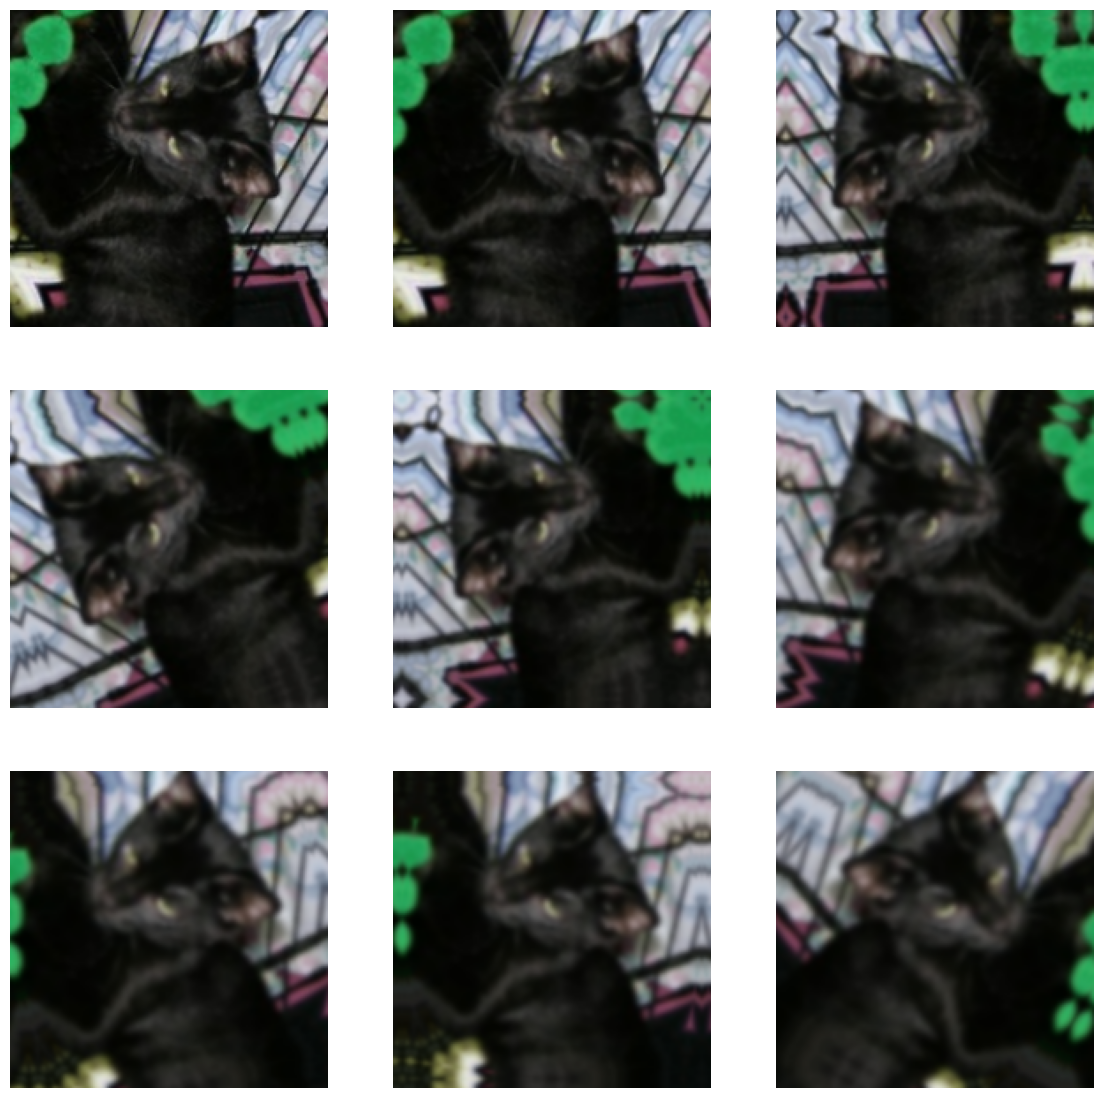

In [11]:
plt.figure(figsize=(14,14))
i=0
for images, labels in train.take(1):
    for i in range (9):
        images= data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.axis("off")

In [12]:
model=Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16,3,padding="same",activation="relu",input_shape="180,180"),
    MaxPooling2D(),
    
    Conv2D(32,3,padding="same",activation="relu"),
    MaxPooling2D(),
    
    Conv2D(64,3,padding="same",activation="relu"),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(8,activation="softmax"),
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [14]:
model.compile(optimizer="adam",loss="SparseCategoricalCrossentropy",metrics=["accuracy"])

In [15]:
history=model.fit(train,validation_data=vald,epochs=10)

Epoch 1/10


60/60 [==============================] - 42s 674ms/step - loss: 1.5182 - accuracy: 0.4364 - val_loss: 0.8381 - val_accuracy: 0.6897
Epoch 2/10
60/60 [==============================] - 38s 647ms/step - loss: 0.7527 - accuracy: 0.7182 - val_loss: 0.5898 - val_accuracy: 0.7841
Epoch 3/10
60/60 [==============================] - 40s 675ms/step - loss: 0.6458 - accuracy: 0.7679 - val_loss: 0.6256 - val_accuracy: 0.7883
Epoch 4/10
60/60 [==============================] - 36s 594ms/step - loss: 0.5206 - accuracy: 0.8025 - val_loss: 0.5314 - val_accuracy: 0.8155
Epoch 5/10
60/60 [==============================] - 33s 544ms/step - loss: 0.4193 - accuracy: 0.8350 - val_loss: 0.4817 - val_accuracy: 0.8197
Epoch 6/10
60/60 [==============================] - 31s 523ms/step - loss: 0.3918 - accuracy: 0.8528 - val_loss: 0.3289 - val_accuracy: 0.8784
Epoch 7/10
60/60 [==============================] - 35s 588ms/step - loss: 0.3668 - accuracy: 0.8649 - val_loss: 0.3664 - val_accuracy: 0.87

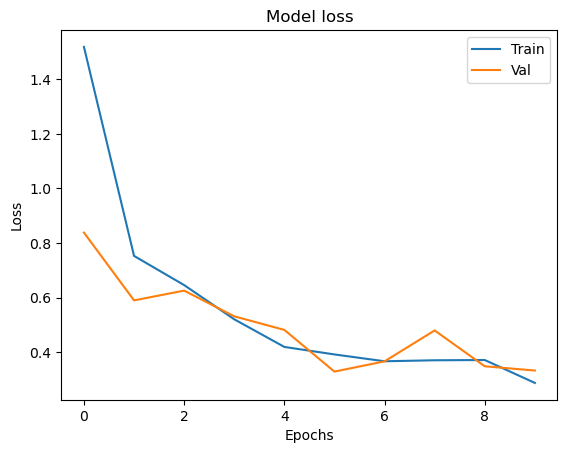

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

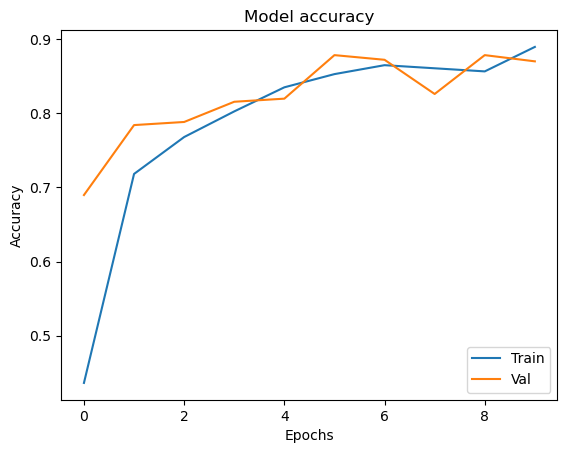

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [34]:
input_image=tf.keras.utils.load_img(r"D:\partiise section\Sample\bike.webp",target_size=(180,180))
input_image_array=tf.keras.utils.img_to_array(input_image)
input_image_exp_dim=tf.expand_dims(input_image_array,0)

prd=model.predict(input_image_exp_dim)
p=prd[0]
p
outcome = "The Image belongs to " + natural_names[np.argmax(p)] + " with a score of " + str(np.max(p) * 100)
outcome
#natural_names[np.argmax(p)]

1/1 [==============================] - 0s 31ms/step


'The Image belongs to motorbike with a score of 67.30129718780518'

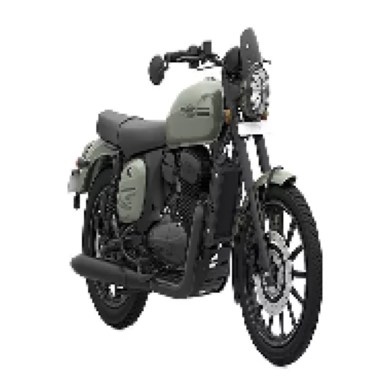

In [35]:
plt.imshow(input_image)
plt.axis('off')
plt.show()